In [247]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns, numpy as np
from itertools import cycle, islice

In [248]:
# File to load
fdata="./Raw_Data/FakeDataSet.csv"

# Read the Data
f_data=pd.read_csv(fdata)
f_data.head()

,UID,City,Zip,Lat,Long,Price,Crime Rate,Rent Price,School Ranking,Housing Growth,HOA
0,1,14,90334,34.104323,-118.124766,"56,641,219",89%,3754,10,18.3655%,1054
1,2,12,90504,34.073326,-118.123124,"20,020,427",45%,3339,9,90.2402%,852
2,3,7,90193,34.110011,-118.134588,"95,804,852",29%,3363,2,53.6122%,225
3,4,7,90090,34.107751,-118.144764,"35,812,244",77%,472,3,42.5692%,317
4,5,12,90155,34.080701,-118.138128,"93,235,765",96%,3905,10,68.3412%,1121


In [249]:
 # Split up our data into groups based upon 'city'
cities_groups = f_data.groupby('City')
cities_groups.head(10)

,UID,City,Zip,Lat,Long,Price,Crime Rate,Rent Price,School Ranking,Housing Growth,HOA
0,1,14,90334,34.104323,-118.124766,"56,641,219",89%,3754,10,18.3655%,1054
1,2,12,90504,34.073326,-118.123124,"20,020,427",45%,3339,9,90.2402%,852
2,3,7,90193,34.110011,-118.134588,"95,804,852",29%,3363,2,53.6122%,225
3,4,7,90090,34.107751,-118.144764,"35,812,244",77%,472,3,42.5692%,317
4,5,12,90155,34.080701,-118.138128,"93,235,765",96%,3905,10,68.3412%,1121
5,6,17,90583,34.108461,-118.126481,"18,784,651",14%,379,6,1.7177%,156
6,7,16,90389,34.098044,-118.152932,"77,475,136",43%,4552,4,2.1485%,543
7,8,10,90084,34.092389,-118.114221,"9,307,164",42%,3929,2,13.4267%,669
8,9,7,90349,34.070083,-118.164215,"63,755,458",77%,3997,7,64.3045%,1230
9,10,3,90007,34.073854,-118.144540,"42,884,203",64%,4047,2,96.5738%,215


In [250]:
f_data['Housing Growth'] = f_data['Housing Growth'].str.rstrip('%').astype('float')/100

f_data.head()

,UID,City,Zip,Lat,Long,Price,Crime Rate,Rent Price,School Ranking,Housing Growth,HOA
0,1,14,90334,34.104323,-118.124766,"56,641,219",89%,3754,10,0.183655,1054
1,2,12,90504,34.073326,-118.123124,"20,020,427",45%,3339,9,0.902402,852
2,3,7,90193,34.110011,-118.134588,"95,804,852",29%,3363,2,0.536122,225
3,4,7,90090,34.107751,-118.144764,"35,812,244",77%,472,3,0.425692,317
4,5,12,90155,34.080701,-118.138128,"93,235,765",96%,3905,10,0.683412,1121


In [251]:
f_data['Crime Rate'] = f_data['Crime Rate'].str.rstrip('%').astype('float')/100

f_data.head()

,UID,City,Zip,Lat,Long,Price,Crime Rate,Rent Price,School Ranking,Housing Growth,HOA
0,1,14,90334,34.104323,-118.124766,"56,641,219",0.89,3754,10,0.183655,1054
1,2,12,90504,34.073326,-118.123124,"20,020,427",0.45,3339,9,0.902402,852
2,3,7,90193,34.110011,-118.134588,"95,804,852",0.29,3363,2,0.536122,225
3,4,7,90090,34.107751,-118.144764,"35,812,244",0.77,472,3,0.425692,317
4,5,12,90155,34.080701,-118.138128,"93,235,765",0.96,3905,10,0.683412,1121


In [259]:
f_data['Price'] = f_data['Price'].str.replace(',',"").astype('float')
f_data.head()

,UID,City,Zip,Lat,Long,Price,Crime Rate,Rent Price,School Ranking,Housing Growth,HOA
0,1,14,90334,34.104323,-118.124766,56641219.0,0.89,3754,10,0.183655,1054
1,2,12,90504,34.073326,-118.123124,20020427.0,0.45,3339,9,0.902402,852
2,3,7,90193,34.110011,-118.134588,95804852.0,0.29,3363,2,0.536122,225
3,4,7,90090,34.107751,-118.144764,35812244.0,0.77,472,3,0.425692,317
4,5,12,90155,34.080701,-118.138128,93235765.0,0.96,3905,10,0.683412,1121


In [260]:
f_data.head()
f_data.dtypes

UID                  int64
City                 int64
Zip                  int64
Lat                float64
Long               float64
Price              float64
Crime Rate         float64
Rent Price           int64
School Ranking       int64
Housing Growth     float64
HOA                  int64
dtype: object

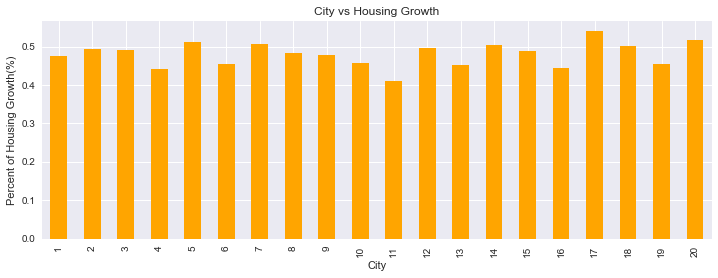

In [261]:
# Split up our data into groups based upon 'city'
cities_groups = f_data.groupby('City')

# Find out each city housing growth percentage
cities_housinggrowth = cities_groups['Housing Growth'].mean()

# Chart our data, give it a title, and label the axes
cities_housinggrowth_chart = cities_housinggrowth.plot(kind='bar', color="orange",figsize=(12,4), title="City vs Housing Growth")
cities_housinggrowth_chart.set_xlabel("City")
cities_housinggrowth_chart.set_ylabel("Percent of Housing Growth(%)")

plt.show()

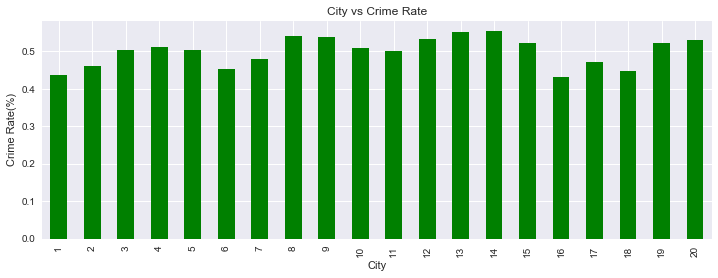

In [262]:
 # Split up our data into groups based upon 'city'
cities_groups = f_data.groupby('City')

# Find out each city Crime Rate
cities_crimerate = cities_groups['Crime Rate'].mean()

# Chart our data, give it a title, and label the axes
cities_crimerate_chart = cities_crimerate.plot(kind="bar", color="green", figsize=(12,4), title="City vs Crime Rate")
cities_crimerate_chart.set_xlabel("City")
cities_crimerate_chart.set_ylabel("Crime Rate(%)")

plt.show()

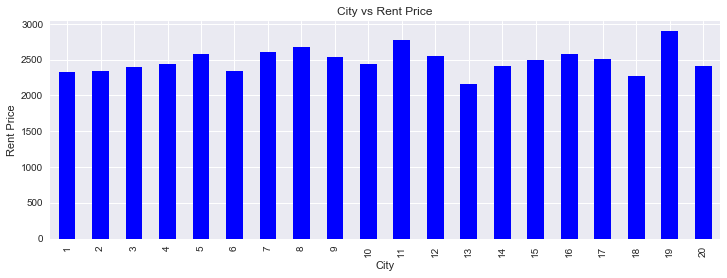

In [263]:
 # Split up our data into groups based upon 'city'
cities_groups = f_data.groupby("City")

# Find out each city average rent price
cities_rentprice = cities_groups["Rent Price "].mean()

# Chart our data, give it a title, and label the axes
cities_rentprice_chart = cities_rentprice.plot(kind="bar", color="blue",figsize=(12,4), title="City vs Rent Price")
cities_rentprice_chart.set_xlabel("City")
cities_rentprice_chart.set_ylabel("Rent Price")

plt.show()

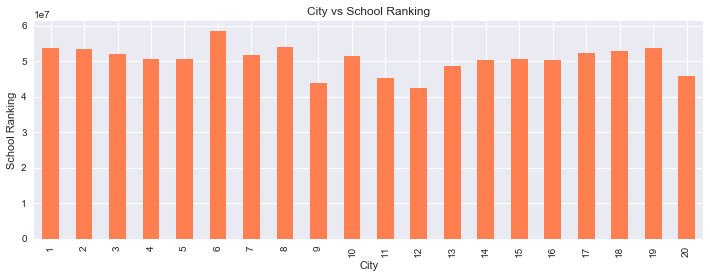

In [264]:
 # Split up our data into groups based upon 'city'
cities_groups = f_data.groupby("City")

# Find out each city average school ranking
cities_school = cities_groups["School Ranking "].mean()

# Chart our data, give it a title, and label the axes
cities_school_chart = cities_price.plot(kind="bar",color="coral",figsize=(12,4), title="City vs School Ranking")
cities_school_chart.set_xlabel("City")
cities_school_chart.set_ylabel("School Ranking")

plt.show()

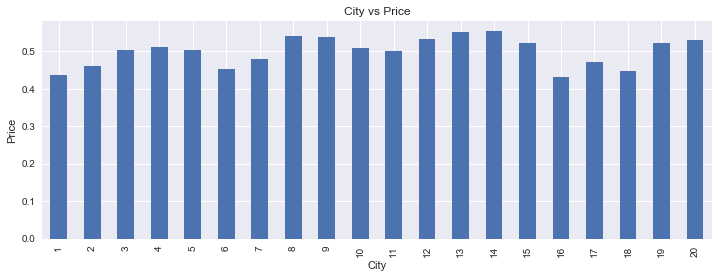

In [265]:
 # Split up our data into groups based upon 'city'
cities_groups = f_data.groupby("City")

# Find out each city average price
cities_price = cities_groups["Price"].mean()

# Chart our data, give it a title, and label the axes
cities_price_chart = cities_crimerate.plot(kind="bar",figsize=(12,4), title="City vs Price")
cities_price_chart.set_xlabel("City")
cities_price_chart.set_ylabel("Price")

plt.show()